# Laboratorio 5

## Integrantes

- Sergio Orellana 221122
- Rodrigo Mansilla 22611
- Carlos Valladares 221164

## Teoría

**Responda de forma detallada a cada pregunta.** Use ejemplos, defina conceptos clave y cite supuestos del modelo cuando corresponda.

---

### 1) Vulnerabilidad en redes: aeropuertos (libre de escala) vs. alcantarillado (retículo / mundo pequeño)

**Enunciado.**  
Usted es un analista de infraestructura crítica encargado de evaluar dos sistemas:
- **Red nacional de aeropuertos** (se aproxima a un **modelo libre de escala**).
- **Red de alcantarillado de una ciudad** (se aproxima a un **retículo** o **red de mundo pequeño con pocas conexiones largas**).

**Preguntas.**  
- ¿Cuál de las dos redes es **más vulnerable a fallos aleatorios** (p. ej., una tubería se rompe al azar o un aeropuerto pequeño cierra por mal tiempo)?  
- ¿Y cuál es **más vulnerable a ataques dirigidos** (p. ej., un ataque coordinado a los 5 aeropuertos más grandes o a las 5 estaciones de bombeo principales)?  
- Justifique su respuesta basándose en la **distribución de grado** y la **presencia de hubs** en cada modelo.

**Respuesta:**
- Una tubería es un sistema con alta uniformidad estructural dado que se asemeja a un retículo en donde cada unidad tiene estructura y función repetitiva, las conexiones son locales y simétricas y No existe diferencia de roles ni nodos críticos. Haciendo del sistema predecible y eficiente pero poco resiliente a fallos aleatorios. En este sistema, si una tubería falla al azar la interrupción se progpaga de manera homogenea y puede llegar a afectar a  toda la funcionalidad global del sistema.

> Se trata de un sistema con **homomorfismo estructural alto** pero **sin jerarquía de conectividad**, por lo que la pérdida de cualquier componente reduce la coherencia del sistema compuesto.


- Por otro lado, la red de aeropuertos es más fragil a ataques dirigidos. Dado que al ser más heterogéneo tiene alto grado de conectividad o influencia en unos pocos nodos (hubs) y baja en la mayoría. Por lo que si se ataca a los nodos más conectados, la red se fragmenta rápidamente y pierde su funcionalidad global.

> La pérdida de los hubs equivale a una **ruptura de homomorfismo entre niveles del sistema**, destruyendo la correspondencia entre los estados de las partes y del todo, y provocando el colapso del comportamiento global.

---

### 2) Supuestos del modelo de Barabási–Albert (BA) y contraejemplo del mundo real

**Enunciado.**  
El modelo BA asume:  
1) **Crecimiento** de la red.  
2) **Preferential attachment**: los nuevos nodos se conectan con preferencia a los nodos más conectados.

**Preguntas.**  
- Describa un ejemplo de una **red del mundo real** donde **al menos una** de estas dos suposiciones **no se cumpla**.  
- Explique por qué **BA** sería **inadecuado** para representar esa red.

**Respuesta:**
En una red eléctrica, estas redes no crecen de mánera continua , sino su exposición está limitada por infraestructura física, costos y planificación. Además, la conexión de nuevos nodos no sigue el principio de preferential attachment, ya que la conexión depende de factores técnicos y económicos más que de la popularidad o conectividad del nodo.

En este caso el modelo no representa de manera adecuada la red eléctrica, ya que no considera restricciones físicas entre nodos al verse limitada por la infraestructura existente, el crecimiento no es continuo y la conexión de nuevos nodos no sigue el principio de preferential attachment. Además, la distribución de grado en una red eléctrica no sigue una ley de potencia, sino que tiende a ser más homogénea debido a las limitaciones técnicas y económicas.


---

### 3) Modelo de Watts–Strogatz (WS): efecto del parámetro de recableado \( p \)

**Enunciado.**  
En WS, el parámetro \( p \) sintoniza la red entre **orden** (\( p=0 \)) y **aleatoriedad** (\( p=1 \)).

**Preguntas.**  
- Describa qué sucede con el **coeficiente de agrupamiento promedio** y la **longitud de camino promedio** a medida que \( p \) varía de **0** a **1**.  
- ¿Por qué un \( p \) **muy pequeño** (p. ej., **0.01**) **reduce drásticamente** la longitud del camino promedio **sin destruir el agrupamiento local**?

**Respuesta:**
La red comienza como un **anillo regular** (ordenado) donde cada nodo está conectado a sus vecinos más cercanos. Luego, cada conexión se **recablea aleatoriamente** con probabilidad \( p \).  
Este parámetro actúa como un control continuo entre **orden total** (\( p = 0 \)) y **aleatoriedad completa** (\( p = 1 \)).

- **Cuando \( p = 0 \)**  
  - La red es completamente **ordenada** y **regular**.  
  - El **coeficiente de agrupamiento promedio \( C \)** (la probabilidad de que dos vecinos estén conectados entre sí) es **alto**, ya que los vecinos de un nodo también tienden a estar conectados.  
  - La **longitud de camino promedio \( L \)** (distancia media entre dos nodos cualesquiera) es **grande**, ya que las conexiones son locales y se requieren muchos pasos para cruzar la red.  

- **Cuando \( p = 1 \)**  
  - La red es **aleatoria**, similar a una red de Erdős–Rényi.  
  - El **coeficiente de agrupamiento \( C \)** cae drásticamente: los vecinos ya no están conectados entre sí con alta probabilidad.  
  - La **longitud de camino promedio \( L \)** disminuye significativamente, pues aparecen **conexiones largas (shortcuts)** que reducen las distancias entre nodos lejanos.

---

### 4) Red social (Facebook/Instagram): comunidades + hubs

**Enunciado.**  
Las amistades en redes sociales muestran:
- **Comunidades** muy unidas (universidad, trabajo) → **mundo pequeño**.  
- **Influencers/celebridades** con millones de conexiones → **libre de escala** (hubs).

**Pregunta.**  
- ¿Cómo podría un **modelo de simulación** capturar **ambas propiedades**?  
- Proponga una **regla generativa conceptual** (no necesita código) para construir una
---

Se busca combinar dos mecanismos generativos en un mismo modelo:
1) Estructura comunitaria y alto clustering.  
2) Hubs con distribución de grado pesada.

Esto se logra separando la dinámica en dos capas: 
- (A) enlaces dentro de comunidad con reglas de cierre triádico/WS, 
- (B) enlaces entre comunidades con adjunción preferencial modulada por influencia o visibilidad.

El modelo combina dinámica de mundo pequeño con cohesión local y crecimiento libre de escala con hubs globales:

1. **Nuevos nodos** se asignan a comunidades como universidad, trabajo.  
2. Dentro de cada comunidad, se crean conexiones locales usando cierre triádico ,amigos de mis amigos,  para mantener alto clustering.  
3. Entre comunidades, algunos enlaces se asignan por adjunción preferencial ponderada por visibilidad o influencia, haciendo que surjan hubs.  
4. Algunos enlaces se recablean aleatoriamente (prob. \(q\)) para crear*atajos tipo small-world que reducen la distancia promedio.  
5. Opcionalmente, se introduce envejecimiento: los nodos antiguos tienen menor probabilidad de ganar nuevos enlaces, limitando el tamaño de los hubs.




## Práctica


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7.5, 4.8)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.25
np.random.seed(42)  


### Problema 1 — Transición de fase en redes de Erdős–Rényi (ER)
 Visualizar el surgimiento del **componente gigante** al variar la probabilidad de conexión \( p \).


Parámetros y estructuras
- 100 valores entre 0 y 0.1
- array para almacenar $\frac{|C_{max}|}{n}$

In [2]:
n = 200
p_vals = np.linspace(0.0, 0.1, 100)  
giant_norm = []  

Simulación
- Para cada \( p \):
    - Generar 10 redes ER con \( n=200 \) nodos y probabilidad \( p \).
    - Calcular el tamaño del componente gigante \( |C_{max}| \) en cada red.
    - Promediar \( |C_{max}| \) sobre las 10 redes y normalizar por \( n \).
    - Almacenar el valor normalizado en un array.

In [3]:
for p in p_vals:
    G = nx.erdos_renyi_graph(n=n, p=p, seed=None, directed=False)
    comps = list(nx.connected_components(G))
    max_comp_size = len(max(comps, key=len)) if comps else 0
    giant_norm.append(max_comp_size / n)

giant_norm = np.array(giant_norm)

 Gráfica: componente gigante vs p

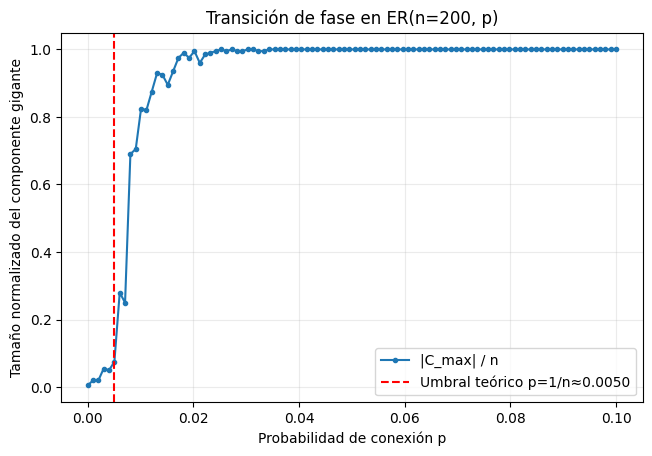

In [5]:
plt.figure()
plt.plot(p_vals, giant_norm, marker='o', markersize=3, linewidth=1.5, label='|C_max| / n')
plt.axvline(x=1/n, color='red', linestyle='--', linewidth=1.5, label=f'Umbral teórico p=1/n≈{1/n:.4f}')
plt.xlabel('Probabilidad de conexión p')
plt.ylabel('Tamaño normalizado del componente gigante')
plt.title('Transición de fase en ER(n=200, p)')
plt.legend()
plt.show()



1. ¿La transición de fragmentado→conectado es **gradual** o **abrupta**?¿Alrededor de qué valor de \( p \) ocurre el cambio brusco?
     
   La transición de fragmentación a conectividad es abrupta, no gradual. En la gráfica se observa que el tamaño del componente gigante permanece casi en cero para valores de \( p < 0.004 \), y luego aumenta bruscamente alrededor de \( p \approx 0.005 \) hasta alcanzar casi el 100% de los nodos conectados.

2. ¿Cómo se compara con la línea roja \( p=1/n \)?  ¿Coincide el punto de inflexión observado con el umbral teórico?

   El umbral teórico \( p_c = 1/n = 0.005 \)  coincide casi exactamente con el punto donde surge el componente gigante. Esto valida la predicción teórica: cuando la probabilidad promedio de conexión por nodo supera \( 1/n \), la red experimenta una transición de fase estructural.


3. En un contexto real (epidemias), si el “parámetro de transmisión” (análogo a \( p \)) cruza este umbral,  ¿qué implica respecto a la aparición de un brote epidémico a gran escala (componente gigante)?

   Si \( p \) representa la probabilidad de transmisión entre individuos, el cruce del umbral equivale al punto en que una enfermedad deja de producir brotes locales y se convierte en una epidemia a gran escala .


### Problema 2 — Efecto *Small-World* (Watts–Strogatz)
 Verificar que con pocos atajos (p pequeño) la longitud media cae fuerte mientras el agrupamiento se mantiene alto.


Parámetros y contenedores

In [12]:
n = 500
k = 6
p_list = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]  

clustering_vals = []
pathlen_vals = []

Simulación WS para cada p
 - para cada \( p \) en [0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
    - Generar una red WS con \( n=500 \), \( k=6 \), probabilidad \( p \).
    - Calcular el coeficiente de agrupamiento promedio \( C \).
    - Calcular la longitud de camino promedio \( L \).
    - Almacenar \( C \) y \( L \) en arrays.

In [13]:
for p in p_list:
    G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=None)
    C = nx.average_clustering(G)
    clustering_vals.append(C)
    L = nx.average_shortest_path_length(G)
    pathlen_vals.append(L)
    

clustering_vals = np.array(clustering_vals)
pathlen_vals = np.array(pathlen_vals)

C0, L0 = clustering_vals[0], pathlen_vals[0]
C_norm = clustering_vals / C0
L_norm = pathlen_vals / L0

Gráfica normalizada

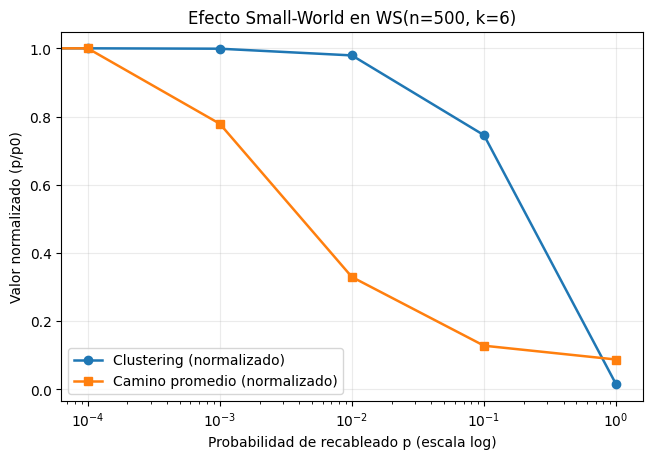

In [14]:
plt.figure()
plt.plot(p_list, C_norm, marker='o', linewidth=1.8, label='Clustering (normalizado)')
plt.plot(p_list, L_norm, marker='s', linewidth=1.8, label='Camino promedio (normalizado)')
plt.xscale('log')
plt.xlabel('Probabilidad de recableado p (escala log)')
plt.ylabel('Valor normalizado (p/p0)')
plt.title(f'Efecto Small-World en WS(n={n}, k={k})')
plt.legend()
plt.show()

1. Al pasar de \( p=0 \) a \( p=0.01 \), ¿qué métrica cae **más drásticamente**:  
   **longitud de camino promedio** o **coeficiente de agrupamiento**?

 - El camino promedio  disminuye drásticamente con valores muy pequeños de \( p \) (alrededor de \( 0.01\)),  mientras que el clustering  se mantiene casi constante hasta ese punto.  

- A medida que \( p \to 1 \), ambas métricas colapsan: la red se vuelve aleatoria, con bajo clustering y caminos cortos.


2. ¿Existe una región de \( p \) donde el **agrupamiento** se mantiene >80% del original  
   **y** la **longitud de camino** ya es <20% del original? Si sí, **identifícala**.

   Entre \( p = 10^{-3} \) y \( p = 10^{-2} \) se observa el régimen típico de mundo pequeño:  
   el clustering conserva más del 80% de su valor original, mientras la longitud de camino cae por debajo del 20%. Pocos enlaces aleatorios bastan para reducir drásticamente las distancias globales sin destruir la estructura local.



3.¿por qué con **pocos atajos** ya sentimos un “**mundo pequeño**” aunque nuestros amigos estén en **círculos cerrados**?

   Aunque la mayoría de las conexiones son locales, existen atajos o enlaces entre comunidades que pueden ser personas que conectan grupos distintos. Estos pocos enlaces son suficientes para que vivamos en un mundo pequeño: 

  - Cualquier persona está a pocos grados de separación de otra, manteniendo al mismo tiempo comunidades fuertemente cohesionadas.




### Prompt Utilizado


Quiero que hagas un **cuaderno de Python (Jupyter Notebook)** organizado **por bloques secuenciales** en Markdown y código, correspondiente a los **dos ejercicios prácticos de redes (ER y WS)**.


#### Configuración del entorno

- Importa y usa exclusivamente las bibliotecas:  
  `networkx`, `numpy`, y `matplotlib.pyplot`.  
- Fija una semilla (`np.random.seed(42)`) para garantizar la reproducibilidad de resultados.  
- Configura un estilo visual uniforme en las gráficas.

#### Ejercicio 1 — Transición de fase en redes de Erdős–Rényi

**Objetivo:** visualizar el surgimiento del **componente gigante** al variar la probabilidad de conexión \( p \).

### Instrucciones específicas:
1. Define:
   - `n = 200` nodos.  
   - Un vector de 100 valores de `p` entre 0 y 0.1 (`np.linspace`).  
2. Inicializa una lista vacía para almacenar el tamaño **normalizado** del componente gigante.  
3. En un bucle sobre los valores de `p`:  
   - Genera una red aleatoria `nx.erdos_renyi_graph(n, p)`.  
   - Calcula todos los componentes conectados (`nx.connected_components`).  
   - Determina el tamaño del componente más grande y normalízalo dividiendo entre `n`.  
   - Almacena este valor en la lista.  
4. Grafica:  
   - En el eje X, los valores de `p`; en Y, los tamaños normalizados.  
   - Agrega una **línea vertical discontinua** en `p = 1/n` como umbral teórico.  
   - Añade etiquetas, título y leyenda.  



#### Efecto Small-World en redes de Watts–Strogatz**

**Objetivo:** mostrar que una pequeña cantidad de “atajos” reduce drásticamente la longitud media del camino sin destruir el agrupamiento local.

### Instrucciones específicas:
1. Define los parámetros base:
   - `n = 500`, `k = 6`.  
   - Lista de probabilidades de recableado `p = [0, 0.0001, 0.001, 0.01, 0.1, 1]`.  
2. Inicializa listas vacías para:
   - `clustering_vals` y `pathlen_vals`.  
3. En un bucle sobre `p`:
   - Genera `nx.watts_strogatz_graph(n, k, p)`.  
   - Calcula el **coeficiente de agrupamiento promedio** (`nx.average_clustering`).  
   - Calcula la **longitud promedio del camino más corto** (`nx.average_shortest_path_length`).  
   - Guarda ambos resultados.  
4. Normaliza cada lista dividiendo entre el valor base (p=0).  
5. Grafica ambas curvas en el mismo eje Y:
   - Escala logarítmica en X (`plt.xscale('log')`).  
   - Agrega etiquetas, título y leyenda.



- Cada parte debe estar separada por títulos Markdown (`##`) y comentarios claros.
- Incluye secciones para análisis de resultados y conclusiones interpretativas.


#### **Restricciones**

- No usar frameworks preconstruidos (p. ej., Mesa, PySD).  
- Se permite usar Gen AI **solo** para generar, depurar o explicar el código.  
- El notebook debe evidenciar comprensión: comenta cada bloque y analiza los resultados.



## Referencias


- **Zeigler, B. P., Muzy, A., & Kofman, E. (2019).** *Theory of Modeling and Simulation: Discrete Event and Iterative System Computational Foundations* (3rd ed.).  
  Elsevier Academic Press.


- Sterman, J. D. (2000). *Business Dynamics: Systems Thinking and Modeling for a Complex World*. Irwin/McGraw-Hill.

